In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import sweetviz as sv


/Users/shivasaivummaji/miniconda3/envs/stock_market_proj/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
sp500_historic_df = pd.read_csv("/Users/shivasaivummaji/Desktop/CS:DS/Stock-Market-Analysis-1/sp500_historical.csv")
display(sp500_historic_df.head())

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-07-27,A,36.504906,39.610001,39.650002,38.610001,39.040001,5261300.0
1,2015-07-27,AAPL,27.496405,30.692499,30.902500,30.530001,30.772499,177822000.0
2,2015-07-27,ABBV,45.658775,69.339996,70.959999,68.459999,68.459999,12841500.0
3,2015-07-27,ABT,41.930363,50.689999,50.849998,50.209999,50.639999,5484200.0
4,2015-07-27,ACGL,22.216158,23.363333,23.526667,23.309999,23.366667,923700.0


In [16]:
print(sp500_historic_df.columns)

Index(['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')


In [ ]:
# Lib for EDA visual

report = sv.analyze(sp500_historic_df)
report.show_html("sweetviz_eda.html")


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)
0:101: execution error: File some object wasn’t found. (-43)


Report sweetviz_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [30]:
tickers = sp500_historic_df["Ticker"]
unique_tickers = set(tickers.values)
print(len(unique_tickers), unique_tickers)
print(tickers.isna().any())
print(tickers.dtype)

503 {'HWM', 'EIX', 'CSCO', 'ATO', 'STLD', 'WMB', 'HLT', 'CAG', 'ES', 'VICI', 'JNJ', 'ABNB', 'TAP', 'HIG', 'F', 'CME', 'ALGN', 'PTC', 'SW', 'WMT', 'LLY', 'WSM', 'EW', 'BXP', 'RSG', 'LEN', 'TPL', 'TPR', 'AMD', 'KMB', 'EXPE', 'GOOG', 'POOL', 'LYV', 'LIN', 'ALLE', 'AAPL', 'GEHC', 'DIS', 'TSCO', 'UNP', 'T', 'MCK', 'TER', 'BSX', 'MCD', 'HST', 'IEX', 'DG', 'SBAC', 'REG', 'VTR', 'NSC', 'TROW', 'CBRE', 'FDS', 'KEY', 'MO', 'HPE', 'TSLA', 'TDY', 'COF', 'PODD', 'EXC', 'PAYC', 'RCL', 'DOW', 'APH', 'MLM', 'MKC', 'CCI', 'ROK', 'STE', 'CTVA', 'FSLR', 'CINF', 'QCOM', 'CHD', 'ACN', 'PLD', 'MDT', 'BK', 'RVTY', 'MTB', 'CAH', 'COIN', 'MTD', 'DHR', 'TEL', 'NI', 'GS', 'IDXX', 'PSA', 'LVS', 'AVGO', 'NEM', 'RJF', 'FTV', 'PRU', 'EQT', 'WBD', 'LOW', 'EQR', 'CL', 'GL', 'PGR', 'IFF', 'LII', 'NVR', 'CDW', 'PM', 'CAT', 'EL', 'ARE', 'FICO', 'NTRS', 'TMUS', 'XYL', 'AMZN', 'NDSN', 'WAB', 'AMCR', 'SCHW', 'NXPI', 'CMCSA', 'BBY', 'APO', 'ZBH', 'RL', 'LNT', 'CMG', 'EPAM', 'L', 'SWKS', 'WELL', 'CCL', 'PARA', 'TECH', 'EXE', 

In [29]:
dates = sp500_historic_df["Date"]
print(dates.isna().any())
print(dates.dtype)

False
object


In [28]:
adj_close = sp500_historic_df["Adj Close"]
print(adj_close.isna().any())
print(adj_close.dtype)

False
float64


Data Cleaning

In [ ]:
# Utilizing counts for tickers

ticker_counts = sp500_historic_df['Ticker'].value_counts()
print(ticker_counts)
valid_tickers_t = ticker_counts[ticker_counts > 1826]
print(valid_tickers_t)

ticker_counts_map = {}
for index, row in sp500_historic_df.iterrows():
    ticker = row["Ticker"]
    if ticker in ticker_counts_map:
        ticker_counts_map[ticker] += 1
    else:
        ticker_counts_map[ticker] = 1


Ticker
A       2515
NKE     2515
NXPI    2515
NWSA    2515
NWS     2515
        ... 
GEHC     653
KVUE     558
VLTO     453
SOLV     334
GEV      333
Name: count, Length: 503, dtype: int64
Ticker
A       2515
NKE     2515
NXPI    2515
NWSA    2515
NWS     2515
        ... 
HWM     2194
LW      2187
INVH    2132
IR      2062
VICI    1901
Name: count, Length: 481, dtype: int64


In [ ]:
# Create a set of valid tickers with 5 years or more data
valid_tickers = set()

for ticker, count in ticker_counts_map.items():
    if count > 1826:
        valid_tickers.add(ticker)

In [51]:
print((len(valid_tickers)), valid_tickers)

481 {'HWM', 'EIX', 'CSCO', 'ATO', 'STLD', 'WMB', 'HLT', 'CAG', 'ES', 'VICI', 'JNJ', 'TAP', 'HIG', 'F', 'CME', 'ALGN', 'PTC', 'SW', 'WMT', 'LLY', 'WSM', 'EW', 'BXP', 'RSG', 'LEN', 'TPL', 'TPR', 'AMD', 'KMB', 'EXPE', 'GOOG', 'POOL', 'LYV', 'LIN', 'ALLE', 'AAPL', 'DIS', 'TSCO', 'UNP', 'T', 'MCK', 'TER', 'BSX', 'MCD', 'HST', 'IEX', 'DG', 'SBAC', 'REG', 'VTR', 'NSC', 'TROW', 'CBRE', 'FDS', 'KEY', 'MO', 'HPE', 'TSLA', 'TDY', 'COF', 'PODD', 'EXC', 'PAYC', 'RCL', 'APH', 'MLM', 'MKC', 'CCI', 'ROK', 'STE', 'FSLR', 'CINF', 'QCOM', 'CHD', 'ACN', 'PLD', 'MDT', 'BK', 'RVTY', 'MTB', 'CAH', 'MTD', 'DHR', 'TEL', 'NI', 'GS', 'IDXX', 'PSA', 'LVS', 'AVGO', 'NEM', 'RJF', 'FTV', 'PRU', 'EQT', 'WBD', 'LOW', 'EQR', 'CL', 'GL', 'PGR', 'IFF', 'LII', 'NVR', 'CDW', 'PM', 'CAT', 'EL', 'ARE', 'FICO', 'NTRS', 'TMUS', 'XYL', 'AMZN', 'NDSN', 'WAB', 'AMCR', 'SCHW', 'NXPI', 'CMCSA', 'BBY', 'APO', 'ZBH', 'RL', 'LNT', 'CMG', 'EPAM', 'L', 'SWKS', 'WELL', 'CCL', 'PARA', 'TECH', 'SJM', 'DGX', 'TDG', 'TJX', 'NVDA', 'HSIC', 'U

In [57]:
sp500_historic_df = sp500_historic_df[sp500_historic_df['Ticker'].isin(valid_tickers)]

In [58]:
display(sp500_historic_df)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-07-27,A,36.504906,39.610001,39.650002,38.610001,39.040001,5261300.0
1,2015-07-27,AAPL,27.496405,30.692499,30.902500,30.530001,30.772499,177822000.0
2,2015-07-27,ABBV,45.658775,69.339996,70.959999,68.459999,68.459999,12841500.0
3,2015-07-27,ABT,41.930363,50.689999,50.849998,50.209999,50.639999,5484200.0
4,2015-07-27,ACGL,22.216158,23.363333,23.526667,23.309999,23.366667,923700.0
...,...,...,...,...,...,...,...,...
1232411,2025-07-25,XYZ,80.739998,80.739998,81.080002,78.930000,79.754997,5580815.0
1232412,2025-07-25,YUM,146.699997,146.699997,147.070007,145.104996,145.889999,935447.0
1232413,2025-07-25,ZBH,97.550003,97.550003,97.760002,96.421799,96.779999,894150.0
1232414,2025-07-25,ZBRA,335.690002,335.690002,336.149994,329.399994,334.160004,284868.0


In [62]:
# Forward fill NA values

sp500_historic_df = sp500_historic_df.groupby('Ticker').apply(lambda g: g.fillna(method='ffill')).reset_index(drop=True)
sp500_historic_df = sp500_historic_df.dropna(subset=["Adj Close"])

/var/folders/zw/1p1g2scn1llcnl481zdq41wm0000gn/T/ipykernel_84765/3324818769.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500_historic_df = sp500_historic_df.groupby('Ticker').apply(lambda g: g.fillna(method='ffill')).reset_index(drop=True)
/var/folders/zw/1p1g2scn1llcnl481zdq41wm0000gn/T/ipykernel_84765/3324818769.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sp500_historic_df = sp500_historic_df.groupby('Ticker').apply(lambda g: g.fillna(method='ffill')).reset_index(drop=True)


In [63]:
display(sp500_historic_df)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-07-27,A,36.504906,39.610001,39.650002,38.610001,39.040001,5261300.0
1,2015-07-28,A,37.279064,40.450001,40.470001,39.500000,40.000000,2768200.0
2,2015-07-29,A,37.232983,40.400002,40.730000,40.240002,40.500000,2014100.0
3,2015-07-30,A,37.758293,40.970001,41.049999,40.070000,40.259998,2440400.0
4,2015-07-31,A,37.739868,40.950001,41.139999,40.779999,41.049999,2247700.0
...,...,...,...,...,...,...,...,...
1206371,2025-07-21,ZTS,147.369995,147.369995,150.100006,147.279999,149.289993,2997900.0
1206372,2025-07-22,ZTS,151.190002,151.190002,151.309998,147.250000,147.710007,4560600.0
1206373,2025-07-23,ZTS,153.449997,153.449997,153.839996,151.479996,152.509995,3010700.0
1206374,2025-07-24,ZTS,152.820007,152.820007,154.039993,152.220001,153.559998,3320000.0


In [64]:
sp500_historic_df.to_csv("sp500_historical_clean.csv", index=False)

Exploratory Data Analysis

In [5]:
sp500_historic_df = pd.read_csv("/Users/shivasaivummaji/Desktop/CS:DS/Stock-Market-Analysis-1/sp500_historical_clean.csv")

In [6]:
display(sp500_historic_df)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2015-07-27,A,36.504906,39.610001,39.650002,38.610001,39.040001,5261300.0
1,2015-07-28,A,37.279064,40.450001,40.470001,39.500000,40.000000,2768200.0
2,2015-07-29,A,37.232983,40.400002,40.730000,40.240002,40.500000,2014100.0
3,2015-07-30,A,37.758293,40.970001,41.049999,40.070000,40.259998,2440400.0
4,2015-07-31,A,37.739868,40.950001,41.139999,40.779999,41.049999,2247700.0
...,...,...,...,...,...,...,...,...
1206371,2025-07-21,ZTS,147.369995,147.369995,150.100006,147.279999,149.289993,2997900.0
1206372,2025-07-22,ZTS,151.190002,151.190002,151.309998,147.250000,147.710007,4560600.0
1206373,2025-07-23,ZTS,153.449997,153.449997,153.839996,151.479996,152.509995,3010700.0
1206374,2025-07-24,ZTS,152.820007,152.820007,154.039993,152.220001,153.559998,3320000.0


In [9]:
apple_data = sp500_historic_df[sp500_historic_df["Ticker"] == "AAPL"]

In [10]:
apple_data

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
2515,2015-07-27,AAPL,27.496405,30.692499,30.902500,30.530001,30.772499,177822000.0
2516,2015-07-28,AAPL,27.633026,30.844999,30.977501,30.637501,30.844999,134472400.0
2517,2015-07-29,AAPL,27.545683,30.747499,30.875000,30.567499,30.787500,148046800.0
2518,2015-07-30,AAPL,27.406822,30.592501,30.642500,30.427500,30.580000,134513200.0
2519,2015-07-31,AAPL,27.167175,30.325001,30.660000,30.227501,30.650000,171540000.0
...,...,...,...,...,...,...,...,...
5025,2025-07-21,AAPL,212.479996,212.479996,215.779999,211.630005,212.100006,51377400.0
5026,2025-07-22,AAPL,214.399994,214.399994,214.949997,212.229996,213.139999,46404100.0
5027,2025-07-23,AAPL,214.149994,214.149994,215.149994,212.410004,215.000000,46989300.0
5028,2025-07-24,AAPL,213.759995,213.759995,215.690002,213.529999,213.899994,46022600.0


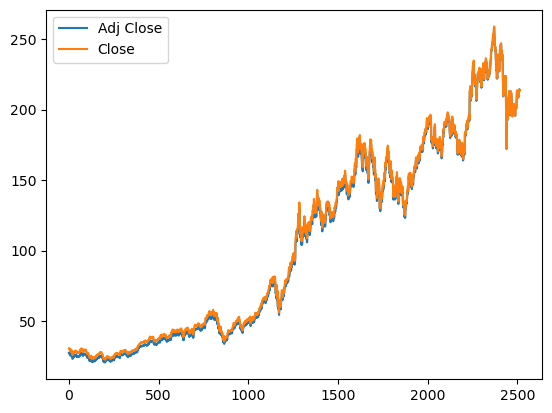

In [23]:
# Plot APPLE data
x = np.arange(0, 2515)
plt.plot(x, apple_data["Adj Close"], label="Adj Close")
plt.plot(x, apple_data["Close"], label="Close")
# plt.plot(x, apple_data["Volume"])
plt.legend()
plt.show()

In [62]:
# Plot data for APPLE, NVIDIA, MSFT, META, GOOGL, AMZN
major_stocks = ["AAPL", "NVDA", "MSFT", "META", "GOOGL", "AMZN"]
df_major = sp500_historic_df[sp500_historic_df["Ticker"].isin(major_stocks)].copy()

# Days since start
start_date = pd.Timestamp("2015-07-27")
df_major['Date'] = pd.to_datetime(df_major['Date'])
df_major['Days_Since_Start'] = (df_major['Date'] - start_date).dt.days

df_major['AdjClose_0'] = df_major.groupby('Ticker')['Adj Close'].transform('first')
df_major['AdjClose_Percent'] = ((df_major['Adj Close'] - df_major['AdjClose_0']) / df_major["AdjClose_0"]) * 100


In [67]:
display(df_major)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Days_Since_Start,AdjClose_0,AdjClose_Percent
2515,2015-07-27,AAPL,27.496405,30.692499,30.902500,30.530001,30.772499,177822000.0,0,27.496405,0.000000
2516,2015-07-28,AAPL,27.633026,30.844999,30.977501,30.637501,30.844999,134472400.0,1,27.496405,0.496870
2517,2015-07-29,AAPL,27.545683,30.747499,30.875000,30.567499,30.787500,148046800.0,2,27.496405,0.179217
2518,2015-07-30,AAPL,27.406822,30.592501,30.642500,30.427500,30.580000,134513200.0,3,27.496405,-0.325797
2519,2015-07-31,AAPL,27.167175,30.325001,30.660000,30.227501,30.650000,171540000.0,4,27.496405,-1.197354
...,...,...,...,...,...,...,...,...,...,...,...
817836,2025-07-21,NVDA,171.380005,171.380005,173.380005,171.000000,172.750000,123126100.0,3647,0.467325,36572.535743
817837,2025-07-22,NVDA,167.029999,167.029999,171.389999,164.580002,171.339996,193114300.0,3648,0.467325,35641.705134
817838,2025-07-23,NVDA,170.779999,170.779999,171.259995,167.970001,169.529999,154082200.0,3649,0.467325,36444.144188
817839,2025-07-24,NVDA,173.740005,173.740005,173.830002,171.300003,172.440002,128984600.0,3650,0.467325,37077.537518


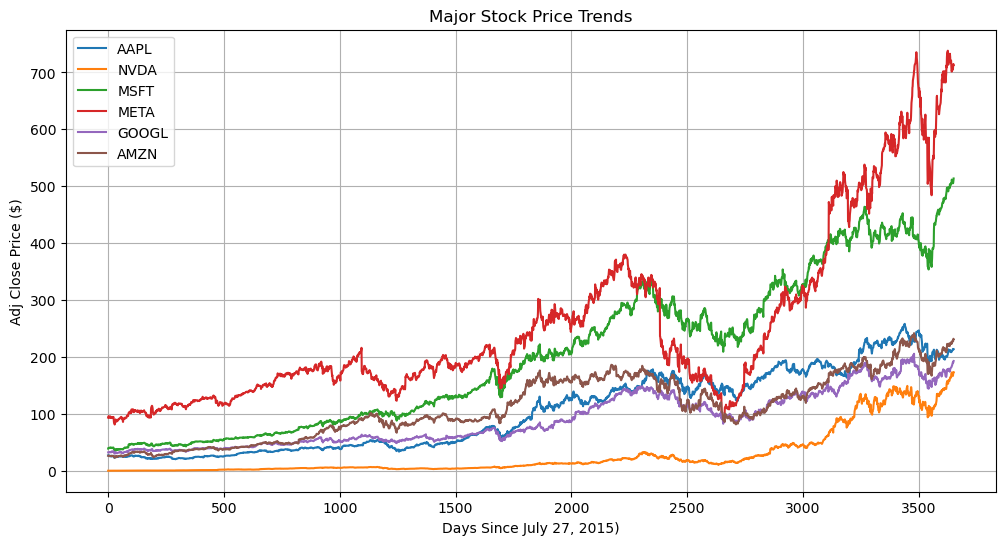

In [68]:
plt.figure(figsize=(12,6))
for ticker in major_stocks:
    subset = df_major[df_major['Ticker']==ticker]
    plt.plot(subset['Days_Since_Start'], subset['Adj Close'], label=ticker)
plt.title("Major Stock Price Trends")
plt.xlabel("Days Since July 27, 2015)")
plt.ylabel("Adj Close Price ($)")
plt.legend()
plt.grid()
plt.show()

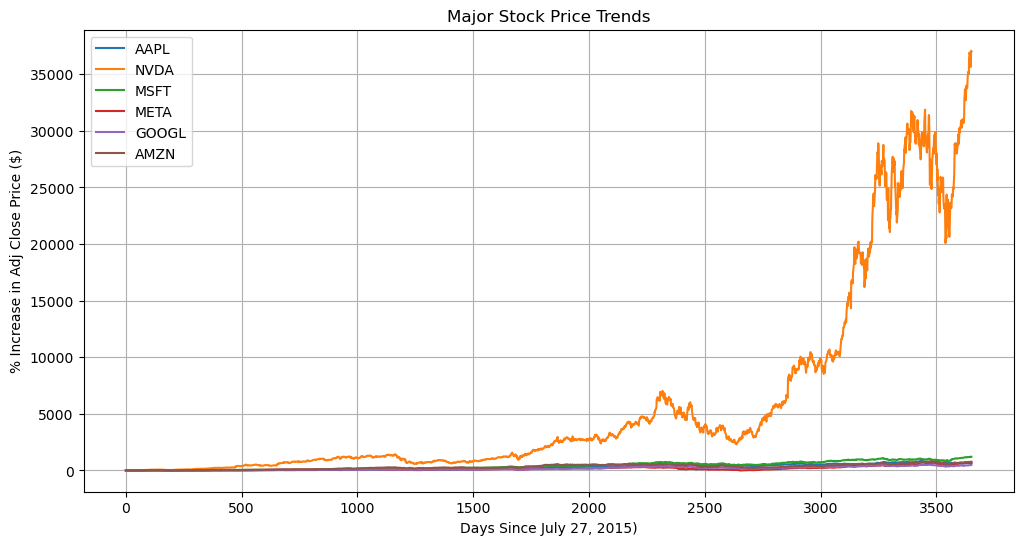

In [69]:
# With NVIDIA
plt.figure(figsize=(12,6))
for ticker in major_stocks:
    subset = df_major[df_major['Ticker']==ticker]
    plt.plot(subset['Days_Since_Start'], subset['AdjClose_Percent'], label=ticker)
plt.title("Major Stock Price Trends")
plt.xlabel("Days Since July 27, 2015)")
plt.ylabel("% Increase in Adj Close Price ($)")
plt.legend()
plt.grid()
plt.show()

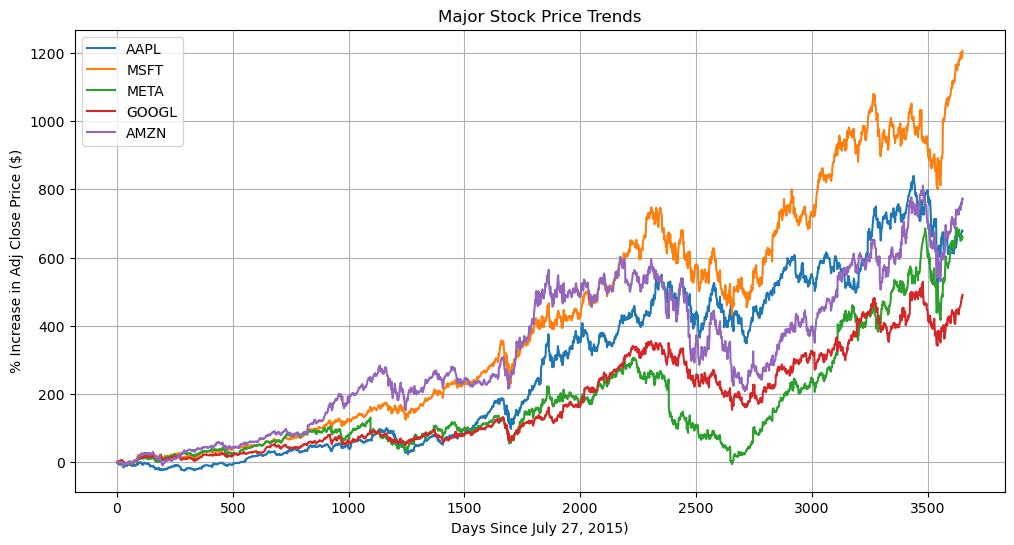

In [70]:
# Cleaner, Without NVIDIA -- too much increase
plt.figure(figsize=(12,6))
for ticker in major_stocks:
    if ticker != "NVDA":
        subset = df_major[df_major['Ticker']==ticker]
        plt.plot(subset['Days_Since_Start'], subset['AdjClose_Percent'], label=ticker)
plt.title("Major Stock Price Trends")
plt.xlabel("Days Since July 27, 2015)")
plt.ylabel("% Increase in Adj Close Price ($)")
plt.legend()
plt.grid()
plt.show()